# 04 - Investigate convolutional weights

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Model restored.
[5, 5, 1, 16]


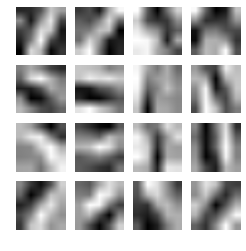

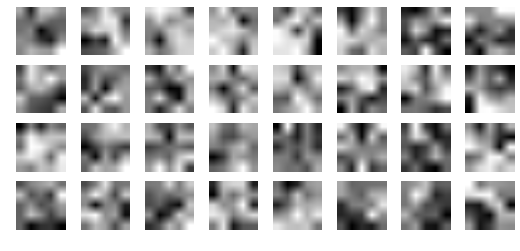

In [4]:
batch_size=1
img_width, img_height = 28, 28
patch_size=5
stddev = 0.1

graph = tf.Graph()
with graph.as_default():
    #tf_input = tf.placeholder(tf.float32, shape=(1, img_height, img_width, 1), name="tf_train_dataset")
    tf_input_1 = tf.ones(shape=(1, img_height, img_width, 1))
        
    all_layers = [1, 16, 32]
    cnns = []
    
    weights = []
    biases = []
    for i in range(len(all_layers) - 1):
        weights.append(
            tf.Variable(
            tf.truncated_normal([
                    patch_size,
                    patch_size,
                    all_layers[i],
                    all_layers[i + 1]], stddev=stddev), name="layer%d_weights" % i))

        biases.append(tf.Variable(
            tf.constant(
                0.1,
                shape=[all_layers[i + 1]]),
            name="layer%d_biases" % i))
            
# Create a session to load the checkpoint and extract the weights
with tf.Session(graph=graph) as sess:
    saver = tf.train.Saver()
    # Restore variables from disk.
    graph = saver.restore(sess, "save/16-08-07-03-27-35.ckpt-0")
    print("Model restored.")
    
    print(weights[0].get_shape().as_list())
    data = weights[0].eval()
            
    f, axarr = plt.subplots(4, 4, figsize=(4,4))
    for i in range(16):
        pic = data[:, :, 0, i]
        canvas = axarr[i % 4, (i//4) % 4]
        #canvas.set_title(i+1, x=-.2, y=0)
        canvas.imshow(pic, cmap='gray')
        canvas.axis('off')
    #plt.title("Convolutional weights - layer 1")
    plt.show()
        
    data = weights[1].eval()
    plt.figure(figsize=(10,10))
    f, axarr = plt.subplots(4, 8, figsize=(9,4))
    #plt.title("Convolutional weights - layer 2")
    for i in range(32):
        pic = data[:, :, 0, i]
        canvas = axarr[i % 4, (i//4) % 8]
        #canvas.set_title(i+1)
        canvas.imshow(pic, cmap='gray')
        canvas.axis('off')
    plt.show()
    
